In [3]:
!pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: snap 1.0-dev-ubuntu22.04.2-x64-py3.10 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of snap or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: gpg 1.16.0-unknown has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that th

In [4]:
!pip cache purge


Files removed: 2217


In [6]:
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.callbacks import TensorBoard, EarlyStopping
from matplotlib import pyplot as plt         

## 2. Load data 

In [7]:
# you can traina model that at first just predict x or y instead of both
# provided by: Dahvyd Wing 
datax = np.load('/home/amir/Documents/2nd_semester/Data_mining/19April/planets_trajectories/x.npy')  
datay = np.load('/home/amir/Documents/2nd_semester/Data_mining/19April/planets_trajectories/y.npy')  
data_names = np.load('/home/amir/Documents/2nd_semester/Data_mining/19April/planets_trajectories/names.npy') 
time1 = [ i * 0.0001 for i in range(0, 9900000)]
time  = pd.DataFrame(time1)
datax = pd.DataFrame(datax).T
datay = pd.DataFrame(datay).T
data_names = pd.DataFrame(data_names)

datax = datax.rename({0: 'Mercury(x)', 1: 'Venus(x)', 2: 'Earth(x)', 3: 'Mars(x)'}, axis=1) 
datay = datay.rename({0: 'Mercury(y)', 1: 'Venus(y)', 2: 'Earth(y)', 3: 'Mars(y)'}, axis=1) 

time = time.rename({0: 'time'}, axis=1)  
print(datax.shape, datay.shape, time.shape)

(9900000, 4) (9900000, 4) (9900000, 1)


In [8]:
type(datax)

pandas.core.frame.DataFrame

In [10]:
datay

,Mercury(y),Venus(y),Earth(y),Mars(y)
0,-0.040137,0.722801,-0.001112,1.329954
1,-0.040953,0.722772,-0.000473,1.329720
2,-0.041768,0.722743,0.000166,1.329487
3,-0.042584,0.722713,0.000805,1.329253
4,-0.043399,0.722683,0.001444,1.329019
...,...,...,...,...
9899995,0.050237,0.026738,-0.114109,-1.333309
9899996,0.051467,0.026005,-0.113474,-1.333541
9899997,0.052697,0.025272,-0.112840,-1.333772
9899998,0.053926,0.024538,-0.112205,-1.334003


In [13]:
timex_df = pd.concat([time, datax], axis=1)
timexy_Mercury = pd.concat([time['time'], datax['Mercury(x)'], datay['Mercury(y)']], axis=1)
timexy_Mercury2400 = timexy_Mercury.iloc[0:2400,:]
timexy_Mercury2400

,time,Mercury(x),Mercury(y)
0,0.0000,-0.464524,-0.040137
1,0.0001,-0.464434,-0.040953
2,0.0002,-0.464342,-0.041768
3,0.0003,-0.464249,-0.042584
4,0.0004,-0.464154,-0.043399
...,...,...,...
2395,0.2395,-0.465556,-0.029137
2396,0.2396,-0.465490,-0.029955
2397,0.2397,-0.465423,-0.030772
2398,0.2398,-0.465354,-0.031589


In [12]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x73f8b3d96800>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x73f8b3d97520>)

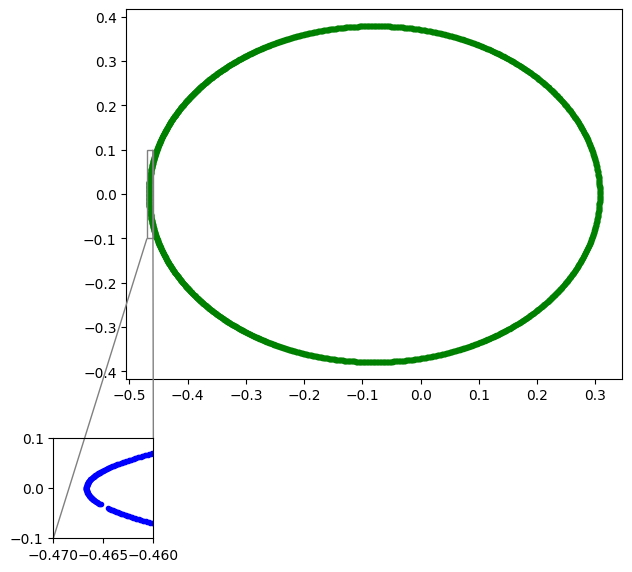

In [14]:
fig, ax = plt.subplots()
axins = inset_axes(ax, 1,1 , loc=2, bbox_to_anchor=(.08, 0.35))
ax.scatter(timexy_Mercury2400.iloc[:,1], timexy_Mercury2400.iloc[:,2], marker='.', color='green', zorder=1)

axins.scatter(timexy_Mercury2400.iloc[:,1], timexy_Mercury2400.iloc[:,2], marker='.', color='b', zorder=1)


x1, x2, y1, y2 = -.47, -.46, -0.1, 0.1 # specifying the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits


mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")


/tmp/ipykernel_290382/3096053281.py:7: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend([l1, l2, l3, l4],     # The line objects


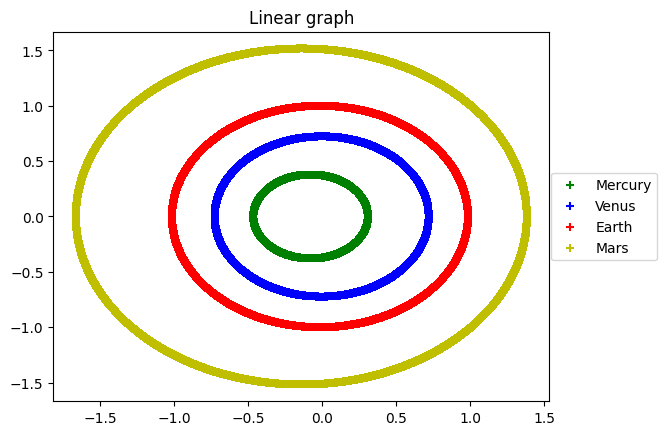

In [15]:
l1 = plt.scatter(datax.iloc[:,0], datay.iloc[:,0], marker='+', color='green', zorder=1)
l2 = plt.scatter(datax.iloc[:,1], datay.iloc[:,1], marker='+', color='blue', zorder=1)
l3 = plt.scatter(datax.iloc[:,2], datay.iloc[:,2], marker='+', color='r', zorder=1)
l4 = plt.scatter(datax.iloc[:,3], datay.iloc[:,3], marker='+', color='y', zorder=1)
plt.title("Linear graph")
line_labels = ["Mercury", "Venus", "Earth", "Mars"]
plt.legend([l1, l2, l3, l4],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center left",    # Position of legend
           bbox_to_anchor=(1, 0.5),
           borderaxespad=0.1,    # Small spacing around legend box
           #title=""  # Title for the legend
           )
plt.show() 

## following shows more than a complete cycle

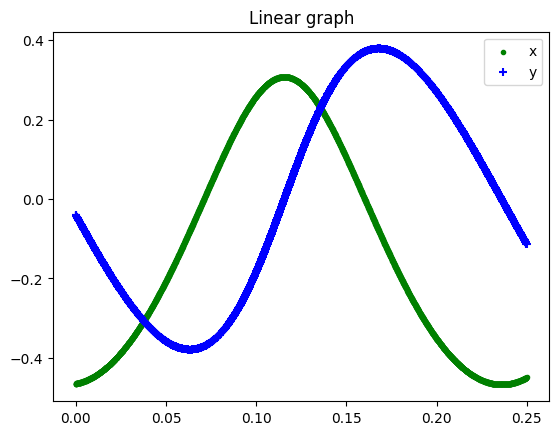

In [16]:
plt.scatter(timexy_Mercury.iloc[0:2500,0], timexy_Mercury.iloc[0:2500,1] , marker='.', color='g', label = 'x')
plt.scatter(timexy_Mercury.iloc[0:2500,0], timexy_Mercury.iloc[0:2500,2], marker='+', color='blue', label = 'y')
plt.title("Linear graph")

plt.legend()

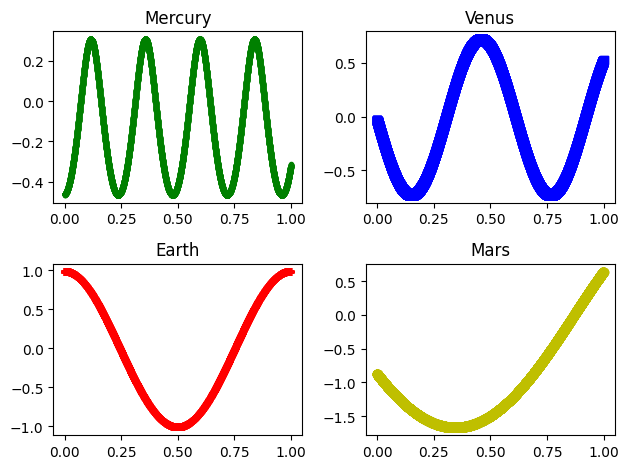

In [9]:
# evolution of one feature over time i.e. position of x for each planet
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(timex_df.iloc[0:10000,0], timex_df.iloc[0:10000,1] , marker='.', color='g')
axs[0, 0].set_title(data_names.iloc[0][0])
axs[0, 1].scatter(timex_df.iloc[0:10000,0], timex_df.iloc[0:10000,2] , marker='s', color='b')
axs[0, 1].set_title(data_names.iloc[1][0])
axs[1, 0].scatter(timex_df.iloc[0:10000,0], timex_df.iloc[0:10000,3] , marker='+', color='r')
axs[1, 0].set_title(data_names.iloc[2][0])
axs[1, 1].scatter(timex_df.iloc[0:10000,0], timex_df.iloc[0:10000,4] , marker='o', color='y')
axs[1, 1].set_title(data_names.iloc[3][0])
fig.tight_layout()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(time.iloc[:], datax.iloc[:,0],  train_size=0.75, random_state=0)
print(X_train.shape)
print(y_train.shape)

(7425000, 1)
(7425000,)


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [12]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [13]:
# load the dataset
dataframe = timexy_Mercury2400.iloc[:,1:2]
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset

array([[-0.46452358],
       [-0.46443385],
       [-0.4643423 ],
       ...,
       [-0.4654232 ],
       [-0.4653542 ],
       [-0.46528342]], dtype=float32)

In [14]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [15]:
dataset[0]

array([0.00281405], dtype=float32)

In [16]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1608 792


In [17]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
create_dataset(dataset[1])

(array([], dtype=float64), array([], dtype=float64))

In [19]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [20]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [21]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=19, batch_size=20, verbose=2)

2023-09-06 21:15:47.719732: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-09-06 21:15:47.720933: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-09-06 21:15:47.721592: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (amir-XPS): /proc/driver/nvidia/version does not exist
2023-09-06 21:15:47.724589: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/19
81/81 - 2s - loss: 0.3180 - 2s/epoch - 20ms/step
Epoch 2/19
81/81 - 0s - loss: 0.1628 - 141ms/epoch - 2ms/step
Epoch 3/19
81/81 - 0s - loss: 0.0837 - 140ms/epoch - 2ms/step
Epoch 4/19
81/81 - 0s - loss: 0.0526 - 141ms/epoch - 2ms/step
Epoch 5/19
81/81 - 0s - loss: 0.0403 - 151ms/epoch - 2ms/step
Epoch 6/19
81/81 - 0s - loss: 0.0311 - 152ms/epoch - 2ms/step
Epoch 7/19
81/81 - 0s - loss: 0.0227 - 145ms/epoch - 2ms/step
Epoch 8/19
81/81 - 0s - loss: 0.0156 - 140ms/epoch - 2ms/step
Epoch 9/19
81/81 - 0s - loss: 0.0099 - 142ms/epoch - 2ms/step
Epoch 10/19
81/81 - 0s - loss: 0.0058 - 138ms/epoch - 2ms/step
Epoch 11/19
81/81 - 0s - loss: 0.0031 - 141ms/epoch - 2ms/step
Epoch 12/19
81/81 - 0s - loss: 0.0015 - 139ms/epoch - 2ms/step
Epoch 13/19
81/81 - 0s - loss: 6.8123e-04 - 145ms/epoch - 2ms/step
Epoch 14/19
81/81 - 0s - loss: 2.9470e-04 - 140ms/epoch - 2ms/step
Epoch 15/19
81/81 - 0s - loss: 1.2793e-04 - 136ms/epoch - 2ms/step
Epoch 16/19
81/81 - 0s - loss: 6.3631e-05 - 142ms/epoc

In [22]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

25/25 [==============================] - 0s 1ms/step
Train Score: 0.00 RMSE
Test Score: 0.01 RMSE


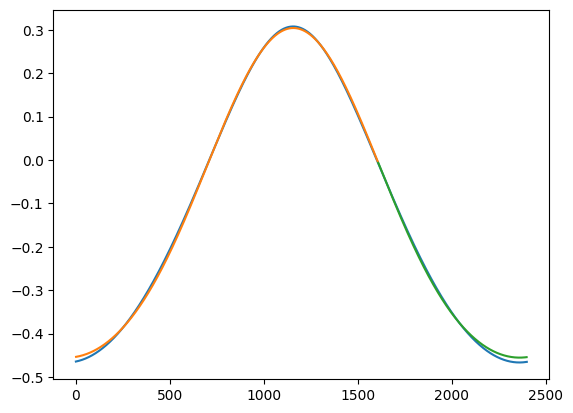

In [23]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()